## Physics of Skipping a Rock ## 

by Robert Garbutt and Nathan Aguilar

Based on the analysis of Lyderic Bocquet in his paper _The Physics of Stone Skipping_

https://arxiv.org/pdf/physics/0210015.pdf



EOM from the paper that the entirety of our analysis is based off of:
\begin{align*}
M \frac{dV_x}{dt} =& -\frac{1}{2}\rho_w V^2 S_{im}(C_l \sin \theta +C_f \cos \theta)\\
M \frac{dV_z}{dt} =&-Mg +\frac{1}{2}\rho_w V^2 S_{im}(C_l \cos \theta - C_f \sin \theta)
\end{align*}
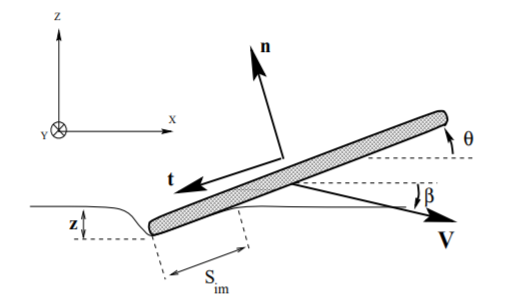

Relevant constants and packages.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81 #gravitational acceleration m/s^2
rho = 1000 #mass density of water kg/m^3
C_f = .5 #coefficient of friction for water
C_l = 2 #coefficient of lift for water

tilt_angle = np.pi/36
side_length = 0.1
mass = 0.1

R = side_length/2

C = C_l*np.cos(tilt_angle)-C_f*np.sin(tilt_angle) 
alpha = np.sqrt(4*mass*g/(C*rho*side_length*side_length))
C = C_l*np.cos(tilt_angle)-C_f*np.sin(tilt_angle)        
C_tilda = C_l*np.sin(tilt_angle)+C_f*np.cos(tilt_angle)
simc = side_length/np.sin(tilt_angle)

Initial throw dynamics.
\begin{align*}
v_z =&\, v_{z0} +-gt\\
z =&\, z_0 +v_{z0} t -\frac{g}{2}t^2\\
v_x =&\, v_{x0}\\
x =&\, v_{x0}t+x_0
\end{align*}

In [22]:
def Initial_Throw(v_xi,v_zi,x_0,z_0,t): #Initial parabolic motion simple projectile motion.
    v_z = v_zi + -g*t
    
    z = z_0 + v_zi*t-g/2*t*t
    
    v_x = v_xi
    
    x = v_xi*t+x_0
    return v_x,v_z,x,z

Motion between collisions. Simple Newtonian mechanics.
\begin{align*}
z =& -\frac{g}{2}t^2 +v_{z0}t+z_0\\
v_z =& -gt + v_{z0}\\
v_x =& \, v_{x0}\\
x =& \, v_{x0} t +x_0\\
v_c =& \frac{\sqrt{\frac{4 M g}{C \rho_w a^2}}}{\sqrt{1-\frac{2\tan^2(\beta) M}{a^3 C \rho_w \sin\theta}}}
\end{align*}

In [23]:
def Between_Collision(v_xi,v_zi,x_0,z_0,t): #Calculates positions between the collisions, simple battleship motion.
    z = -g/2*t*t+v_zi*t + z_0
    v_z = -g*t+v_zi
    v_x = v_xi
    x = v_xi*t+x_0
    return v_x,v_z, x, z

Euler-Cromer Method: Square rock
\begin{align*}
M \frac{dV_x}{dt} =& -\frac{1}{2}\rho_w V^2 S_{im}(C_l \sin \theta +C_f \cos \theta)\\
M \frac{dV_z}{dt} =&-Mg +\frac{1}{2}\rho_w V^2 S_{im}(C_l \cos \theta - C_f \sin \theta)\\
S_{im} =& \frac{a|z|}{\sin\theta}
\end{align*}

In [25]:
def Euler_Square( vx0, vz0):
    
    T = 100000
    dt = 0.0000004
    x_data = np.zeros(T)
    vx_data = np.zeros(T)
    z_data = np.zeros(T)
    vz_data = np.zeros(T)
    
    vx_data[0] = vx0
    vz_data[0] = vz0
    
    
    for i in range(1,T):
        vx_data[i] = vx_data[i-1] + (-0.5*rho*(vx_data[i-1]**2 +vz_data[i-1]**2)*simc*np.abs(z_data[i-1])*C_tilda)*dt/mass
        vz_data[i] = vz_data[i-1] + (-mass*g + 0.5*rho*(vx_data[i-1]**2 + vz_data[i-1]**2)*simc*np.abs(z_data[i-1])*C)*dt/mass
        x_data[i] = x_data[i-1] + vx_data[i] * dt
        z_data[i] = z_data[i-1] + vz_data[i] * dt
        
        if z_data[i] >= 0 or vx_data[i] <= 0:
            break
    return x_data, z_data, vx_data, vz_data

Analytic EOM
\begin{align*}
z(t) =& -\frac{g}{\omega^2}+\frac{g}{\omega^2}\cos{\omega t}+\frac{v_{zi}}{\omega}\\
v_z(t) =& -\frac{g}{\omega}\sin{\omega t}+v_{zi}\cos{\omega t}\\
A =& -\frac{a\rho_w v_{xi}^2 C^{*}}{2\sin{\theta}M}\\
v_x(t) =& -A\bigg(\frac{-gt}{\omega^2}+\frac{g}{\omega^3}\sin(\omega t)-\frac{v_{zi}}{\omega^2}\cos(\omega t)\bigg)+v_{xi}-\frac{A v_{zi}}{\omega^2}\\
x(t) =& -A\bigg(\frac{-gt^2}{2\omega^2}-\frac{g}{\omega^4}\cos(\omega t)-\frac{v_{zi}}{\omega^3}\sin(\omega t)\bigg)+\bigg(v_{xi}-\frac{A v_{zi}}{\omega^2}\bigg)t-A\frac{g}{\omega^4}
\end{align*}

In [24]:
    def Water_Collision(v_xi,v_zi,t): #Function describes the Collision process using eqn (6) from the paper.
        
        omega_squared = C*rho*v_xi*v_xi*side_length/2/mass/np.sin(tilt_angle) 
        omega = np.sqrt(omega_squared) #angular frequency of motion
        
        z = -g/omega_squared + g/omega_squared*np.cos(omega*t)+v_zi/omega*np.sin(omega*t)

        A = -1/2*rho*C_tilda*side_length/np.sin(tilt_angle)/mass*v_xi**2

        v_z = -g/omega_squared*np.sin(omega*t)+v_zi*np.cos(omega*t)
        
        v_x = -A*(-g/omega_squared*t+g/omega_squared/omega*np.sin(omega*t)-v_zi/omega_squared*np.cos(omega*t))+v_xi-A*(v_zi/omega_squared)

        x = -A*(-g/2/omega_squared*t*t-g/omega_squared**2*np.cos(omega*t)-v_zi/omega**3*np.sin(omega*t))+(v_xi-A*v_zi/omega_squared)*t-A*g/omega_squared/omega_squared
#         v_x = -1/(A*t/mass-1/v_xi)

#         x = -mass*np.log(1/v_xi-A*t/mass)/A-mass*np.log(v_xi)/A
        return v_x,v_z, x, z

Euler-Cromer Method: Circular rock:
\begin{align*}
s =&\, \frac{|z|}{\sin\theta}\\
S_{im} =& \, R^2\Bigg[\arccos\bigg(1-\frac{s}{R}\bigg)-\bigg(1-\frac{s}{R}\bigg)\sqrt{1-\big(1-\frac{s}{R}\big)^2}\Bigg]\\
\end{align*}

In [26]:
def Euler_Circle( vx0, vz0):
    
    T = 100000
    dt = 0.0000004
    zeros = np.zeros(T)
    x_data = np.zeros(T)
    vx_data = np.zeros(T)
    z_data = np.zeros(T)
    vz_data = np.zeros(T)
    

    vx_data[0] = vx0
    vz_data[0] = vz0
    
    
    for i in range(1,T):
        vx_data[i] = vx_data[i-1] + (-0.5*rho*(vx_data[i-1]**2 +vz_data[i-1]**2)*(R*R*(np.arccos(1-np.abs(z_data[i-1])/(np.sin(tilt_angle)*R)) - ((1-np.abs(z_data[i-1])/(np.sin(tilt_angle)*R))*np.sqrt(1 - (1-np.abs(z_data[i-1])/(np.sin(tilt_angle)*R))**2))))*C_tilda)*dt/mass
        vz_data[i] = vz_data[i-1] + (-mass*g + 0.5*rho*(vx_data[i-1]**2 + vz_data[i-1]**2)*(R*R*(np.arccos(1-np.abs(z_data[i-1])/(np.sin(tilt_angle)*R)) - ((1-np.abs(z_data[i-1])/(np.sin(tilt_angle)*R))*np.sqrt(1 - (1-np.abs(z_data[i-1])/(np.sin(tilt_angle)*R))**2))))*C)*dt/mass
        x_data[i] = x_data[i-1] + vx_data[i] * dt
        z_data[i] = z_data[i-1] + vz_data[i] * dt
        
        if z_data[i] >= 0 or vx_data[i] <=0:
            
            break
    return x_data, z_data, vx_data, vz_data

Motion of whole system proper. Contains the water collision

In [35]:
def Square_Stone_Skip(speed, height, throw_angle, method): #Throw angle and tilt_angle between 0-90
    stop = False
    v_xi = speed*np.cos(throw_angle*np.pi/180)   #The velocity in the x and z directions for the throw.
    v_zi = speed*np.sin(throw_angle*np.pi/180)
    
    first_v_zi = -np.sqrt(v_zi*v_zi+2*g*height)  #Velocities in x and z directions for the first collision.
    first_v_xi = v_xi
    
    def V_c_denom(v_x0,v_z0,): #Denominator of "V_c" which is dependent on the incident angle = v_z0/v_x0
        denom = np.sqrt(1-(2*np.tan(np.abs(v_z0)/v_x0)*np.tan(np.abs(v_z0)/v_x0)*mass)/(side_length*side_length*side_length*C*rho*np.sin(tilt_angle)))
        return denom
    
    V_c = alpha/V_c_denom(first_v_xi,first_v_zi)
    
    submerged = True #Trying to use an on/off technique to check which equations of motion to use
                     #When the rock hits the surface of the water from either direction I want to have
                     #the equations of motion change to the corresponding regime. 
    
    
    t = np.ones(10000000)
    
    z_position = height #renaming variables to be used in the recursion
    x_position = 0
    
    v_x = v_xi
    v_z = v_zi
    
#     t_at_first_collision = (v_z+np.sqrt(v_z*v_z+2*g*height))/g #Time until the first collision happens, from simple Newtonian mechanics.
    
    
    Z = [] #initializing the arrays that will hold the final x,z coordinates.
    X = []
    bounces = 0
    
    First_trajectory = True
    total_time = 0
    
    #Actually pieceing everything together
    
    for i in t:
        total_time += 0.001
        if z_position >= 0 and First_trajectory == True: #Initial motion before first collision
            v_x,v_z,x_position,z_position = Initial_Throw(v_x,v_z,x_position,z_position,i*0.001)
            Z.append(z_position)
            X.append(x_position)

            
        elif submerged == True: #When z < 0 aka collision motion
            if method == 1: 
                t_collision = 0
                cz_position = -1
                cv_x = 1
                while cz_position <= 0 and cv_x>=0:

                    cv_x,cv_z,cx_position,cz_position = Water_Collision(v_x,v_z,t_collision)

                    Z.append(cz_position)

                    X.append(x_position+cx_position)

                    t_collision +=0.001
                z_position = cz_position
                x_position = x_position + cx_position
                v_x = cv_x
                v_z = cv_z
            elif method == 2:
                cx, cz, cvx, cvz = Euler_Square( v_x, v_z )
                
                for i in range(0,np.argmin(cvx)):
                    X.append(cx[i]+x_position)
                    Z.append(cz[i])
                    if np.abs(cz[i])>= side_length*np.sin(tilt_angle):
                        stop = True
                
                z_position = cz[np.argmin(cvx)-1]
                x_position = x_position + cx[np.argmin(cvx)-1]
                v_x = cvx[np.argmin(cvx)-1]
                v_z = cvz[np.argmin(cvx)-1]
            else:
                cx, cz, cvx, cvz = Euler_Circle( v_x, v_z )
                
                for i in range(0,np.argmin(cvx)):
                    X.append(cx[i]+x_position)
                    Z.append(cz[i])
                    if np.abs(cz[i])>= side_length*np.sin(tilt_angle):
                        stop = True
                
                z_position = cz[np.argmin(cvx)-1]
                x_position = x_position + cx[np.argmin(cvx)-1]
                
                v_x = cvx[np.argmin(cvx)-1]
                v_z = cvz[np.argmin(cvx)-1]
                    
            submerged = not submerged
            First_trajectory = False
            bounces += 1


        else: #Between collisions
            
            v_x,v_z,x_position,z_position = Between_Collision(v_x,v_z,x_position,z_position,i*0.001)
            if z_position < 0:
                submerged = not submerged
                
            if z_position >=0:
                Z.append(z_position)
                X.append(x_position)
            
            
        if method == 1: #Stopping conditions
            if v_x <= V_c:
                print('Analytic Square')
                print('Distance Traveled:',X[len(X)-1],'m')
                print('Bounces:',bounces)
                print('v_x:',v_x)
                print('v_c:',V_c)
                print('Time Taken:',total_time,'s')
                break
        else:
            if stop == True:
                if method == 2:
                    print('Numeric Square')
                else:
                    print('Circular Numeric')
                print('Distance Traveled',X[len(X)-1],'m')
                print('Bounces',bounces)
                print('Time Taken:',total_time,'s')
                break
    return X, Z


In [36]:
def Graph(x,z,method):
    plt.figure(figsize=[20,10])
    if method == 1:
        plt.title('Square Stone Analytic Solution')
    elif method == 2:
        plt.title('Square Stone Numerical Solution')
    elif method == 3:
        plt.title('Circular Stone Numerical Solution')
    plt.plot(x,z)
    plt.grid(True)
    plt.xlabel('Distance (m)')
    plt.ylabel('Height (m)')
    plt.ylim(-1,1)
    plt.show()

Actual application of code

Analytic Square
Distance Traveled: 21.406964673065282 m
Bounces: 9
v_x: -0.0263613561109155
v_c: 0.4666251005337998
Time Taken: 3.4079999999997357 s


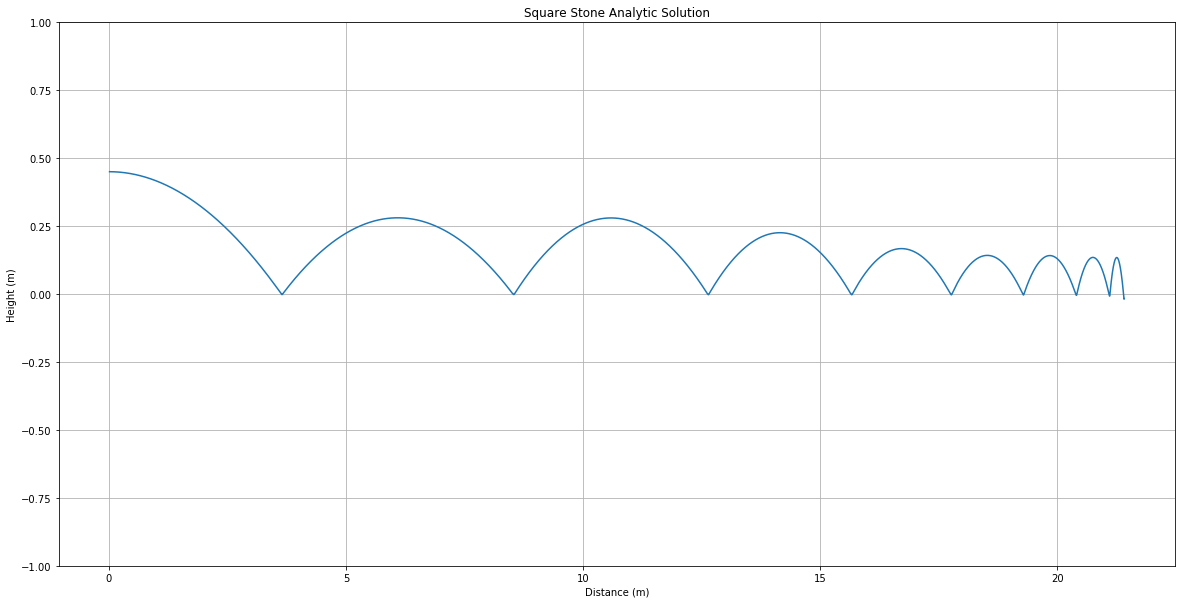

In [40]:
xAsquare, zAsquare = Square_Stone_Skip(12, 1.8/4, 0, 1)#speed, height, throw_angle(degrees), method #
Graph(xAsquare,zAsquare,1)

Numeric Square
Distance Traveled 21.435103719751332 m
Bounces 14
Time Taken: 3.287999999999749 s


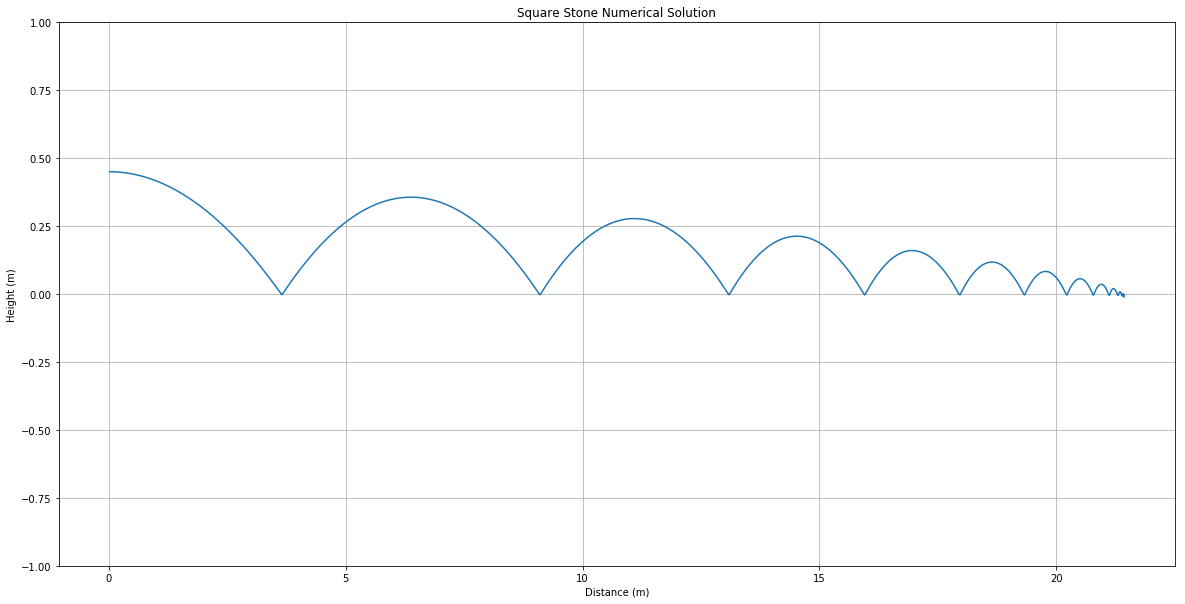

In [39]:
xsquare, zsquare = Square_Stone_Skip(12, 1.8/4, 0, 2)   
Graph(xsquare,zsquare,2)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in arccos
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in arccos
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


Circular Numeric
Distance Traveled 21.399854867399267 m
Bounces 11
Time Taken: 3.2559999999997524 s


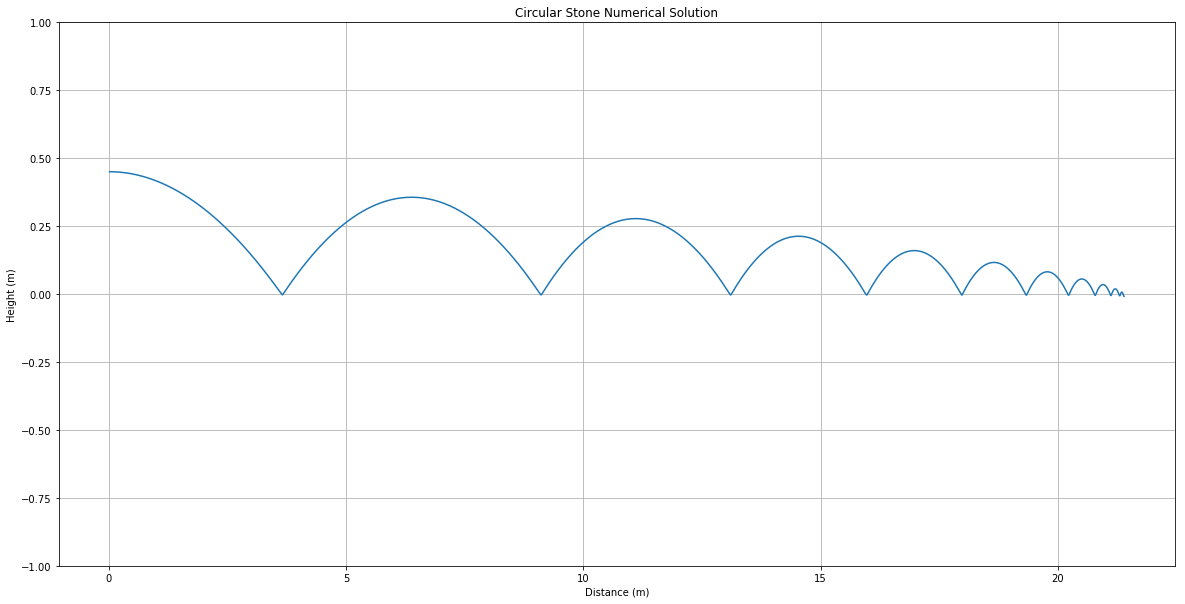

In [38]:
xcircle,zcircle = Square_Stone_Skip(12, 1.8/4, 0, 3)
Graph(xcircle,zcircle,3)